In [149]:
%matplotlib inline

import os
import json
import networkx as nx

from pydot import Edge
from IPython.display import Image, SVG, display

In [81]:
def view_pydot(Gdot):
    plt = SVG(Gdot.create_svg())
    display(plt)

In [263]:
# Read json description of a graph

# graph_path = '../data/cgw/causal/ce_001_protest_out_graph.json'
# graph_path = '../data/cgw/causal/non-restr/ce_001_protest_out_graph.json'
graph_path = '../data/cgw/causal/non-restr/ce_005_disease_outbreak_out_graph.json'
# graph_path = '../data/cgw/causal/ce_040_arrest_out_graph.json'
# graph_path = '../data/cgw/causal/plane_crash_out_graph.json'
# graph_path = '../data/cgw/causal/non-restr/plane_crash_out_graph.json'
# graph_path = '../data/cgw/causal/election_out_graph.json'

In [264]:
with open(graph_path) as fin:
    graph = json.load(fin)

In [265]:
G = nx.DiGraph()
Gdot = nx.drawing.nx_pydot.to_pydot(G)

for edge in graph['edgesSet']:
    u, v = edge['node1']['name'], edge['node2']['name']
    edges_types = [et for et in edge['edgeTypeProbabilities'] if et['edgeType'] != 'nil']
    edge_type = max(edges_types, key=lambda et: et['probability'])['edgeType']
    arrow = '---' if edge_type == 'tt' else '-->'
    print(u, arrow, v)
    if arrow == '-->':
        Gdot.add_edge(Edge(u, v))
    else:
        Gdot.add_edge(Edge(u, v, color='grey', arrowhead='both'))

cure --- diagnose
diagnose --> transmit
diagnose --> vaccinate
spread --> evolve
diagnose --- treat
infect --> diagnose
vaccinate --> treat
infect --- transmit
vaccinate --> evolve
study --> transmit
study --> treat
diagnose --> evolve
test --> treat
test --> evolve
test --> vaccinate
cure --> spread
transmit --> evolve
transmit --> spread
spread --> vaccinate
test --> transmit
treat --> spread
diagnose --> spread
infect --> evolve
test --> spread
study --> spread
infect --- study
transmit --> treat
cure --- treat
vaccinate --> transmit


In [266]:
# TODO: why is it cyclic?
# TODO: verify temporal knowledge

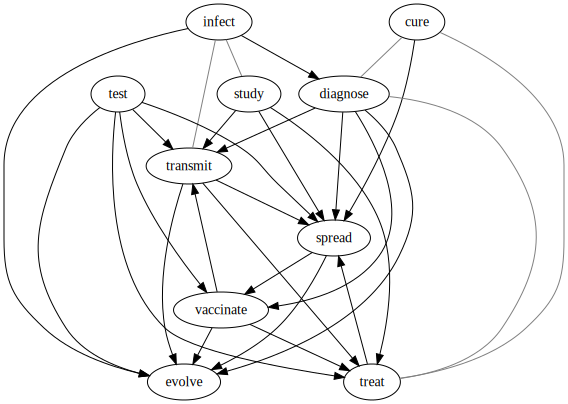

In [267]:
view_pydot(Gdot)

---